In [1]:
import nltk
nltk.download('punkt')
nltk.download('webtext')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jupit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package webtext to
[nltk_data]     C:\Users\jupit\AppData\Roaming\nltk_data...
[nltk_data]   Package webtext is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jupit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jupit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jupit\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [3]:
from sklearn.datasets import fetch_20newsgroups

categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space', 
              'comp.sys.ibm.pc.hardware', 'sci.crypt']

#학습 데이터셋을 가져옴
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)

print('#Train set size:', len(newsgroups_train.data))
print('#Selected categories:', newsgroups_train.target_names)

#Train set size: 3219
#Selected categories: ['alt.atheism', 'comp.graphics', 'comp.sys.ibm.pc.hardware', 'sci.crypt', 'sci.space', 'talk.religion.misc']


In [3]:
#5분 시간 걸림

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(token_pattern=r"\b[\w']{3,}\b", stop_words='english', max_features=2000, min_df=5, max_df=0.5)
review_cv = cv.fit_transform(newsgroups_train.data)

In [7]:
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
np.set_printoptions(precision=3)

lda = LatentDirichletAllocation(n_components = 10, #추출할 topic의 수
                                max_iter=5, 
                                topic_word_prior=0.1, doc_topic_prior=1.0,
                                learning_method='online', 
                                n_jobs= -1, #사용 processor 수
                                random_state=0)

review_topics = lda.fit_transform(review_cv)
print('#shape of review_topics:', review_topics.shape)
print('#Sample of review_topics:', review_topics[0])

gross_topic_weights = np.mean(review_topics, axis=0)
print('#Sum of topic weights of documents:', gross_topic_weights)

print('#shape of topic word distribution:', lda.components_.shape)

#shape of review_topics: (3219, 10)
#Sample of review_topics: [0.007 0.007 0.008 0.022 0.062 0.007 0.008 0.007 0.007 0.865]
#Sum of topic weights of documents: [0.071 0.139 0.074 0.105 0.159 0.095 0.08  0.071 0.088 0.118]
#shape of topic word distribution: (10, 2000)


In [9]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d: " % topic_idx, end='')
        print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        #print(", ".join([feature_names[i]+'('+str(topic[i])+')' for i in topic.argsort()[:-n_top_words - 1:-1]]))
        # 위 slicing에서 맨 뒤 -1은 역순을 의미, 역순으로 했을 때 처음부터 n_top_words까지
    print()

print_top_words(lda,cv.get_feature_names_out(), 10)

Topic #0: mail, information, ftp, available, internet, pub, email, data, anonymous, send
Topic #1: university, posting, nntp, host, com, article, know, reply, distribution, computer
Topic #2: encryption, clipper, government, chip, technology, com, privacy, use, law, new
Topic #3: space, nasa, gov, launch, earth, orbit, moon, shuttle, year, henry
Topic #4: god, people, jesus, don't, does, say, believe, just, think, bible
Topic #5: graphics, image, file, version, files, software, program, jpeg, color, use
Topic #6: scsi, bus, ide, bit, com, ibm, card, memory, isa, cards
Topic #7: drive, disk, com, hard, dos, drives, card, problem, tape, work
Topic #8: key, keys, chip, public, des, nsa, algorithm, com, clipper, number
Topic #9: com, don't, think, article, people, morality, keith, just, sgi, access



n_components: 6, perplexity: 1036.633
n_components: 7, perplexity: 1044.640
n_components: 8, perplexity: 1036.233
n_components: 9, perplexity: 1041.550
n_components: 10, perplexity: 1037.433
n_components: 11, perplexity: 1043.788
n_components: 12, perplexity: 1050.986
n_components: 13, perplexity: 1047.595
n_components: 14, perplexity: 1055.764
n_components: 15, perplexity: 1048.669


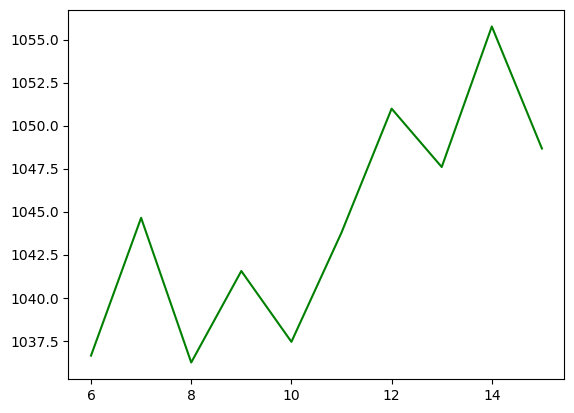

8

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_perplexity(cv, start=10, end=30, max_iter=5, topic_word_prior= 0.1, 
                    doc_topic_prior=1.0):
    iter_num = []
    per_value = []

    for i in range(start, end + 1):
        lda = LatentDirichletAllocation(n_components = i, max_iter=max_iter, 
                                        topic_word_prior= topic_word_prior, 
                                        doc_topic_prior=doc_topic_prior,
                                        learning_method='batch', n_jobs= -1,
                                        random_state=7)    
        lda.fit(cv)
        iter_num.append(i)
        pv = lda.perplexity(cv)
        per_value.append(pv)
        print(f'n_components: {i}, perplexity: {pv:0.3f}')

    plt.plot(iter_num, per_value, 'g-')
    plt.show()
    return start + per_value.index(min(per_value))

show_perplexity(review_cv, start=6, end=15)

In [13]:
lda = LatentDirichletAllocation(n_components = 8, #추출할 topic의 수를 지정
                                max_iter=20, 
                                topic_word_prior= 0.1, 
                                doc_topic_prior=1.0,
                                learning_method='batch',
                                n_jobs= -1, 
                                random_state=7)

review_topics = lda.fit_transform(review_cv)

print_top_words(lda, cv.get_feature_names_out(), 10)

Topic #0: space, nasa, gov, earth, launch, access, moon, orbit, article, year
Topic #1: image, graphics, mail, available, information, software, ftp, data, file, internet
Topic #2: com, article, nntp, host, posting, keith, morality, think, caltech, don't
Topic #3: com, posting, article, i'm, nntp, know, host, don't, just, like
Topic #4: people, god, don't, jesus, just, think, believe, does, say, like
Topic #5: encryption, clipper, government, com, chip, privacy, use, technology, key, new
Topic #6: key, chip, bit, des, number, keys, public, algorithm, message, bits
Topic #7: drive, scsi, card, disk, university, ide, controller, bus, hard, thanks



In [15]:
!pip install --upgrade gensim

In [21]:
# 필요한 library들을 import
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

cachedStopWords = stopwords.words("english")

RegTok = RegexpTokenizer(r"\b[\w']{3,}\b") # 정규포현식으로 토크나이저를 정의
english_stops = set(stopwords.words('english')) #영어 불용어를 가져옴

def tokenizer(text):
    tokens = RegTok.tokenize(text.lower()) 
    # stopwords 제외
    words = [word for word in tokens if (word not in english_stops) and len(word) > 2]
    return words

texts = [tokenizer(news) for news in newsgroups_train.data]

In [23]:
from gensim.corpora.dictionary import Dictionary

# 토큰화 결과로부터 dictionay 생성
dictionary = Dictionary(texts)
print('#Number of initial unique words in documents:', len(dictionary))

# 문서 빈도수가 너무 적거나 높은 단어를 필터링하고 특성을 단어의 빈도 순으로 선택
dictionary.filter_extremes(keep_n = 2000, no_below=5, no_above=0.5)
print('#Number of unique words after removing rare and common words:', len(dictionary))

# 카운트 벡터로 변환
corpus = [dictionary.doc2bow(text) for text in texts]
print('#Number of unique tokens: %d' % len(dictionary))
print('#Number of documents: %d' % len(corpus))

#Number of initial unique words in documents: 45501
#Number of unique words after removing rare and common words: 2000
#Number of unique tokens: 2000
#Number of documents: 3219


In [25]:
from gensim.models import LdaModel

num_topics = 10
passes = 5
%time model = LdaModel(corpus=corpus, id2word=dictionary,\
                       passes=passes, num_topics=num_topics, \
                       random_state=7)

CPU times: total: 51.1 s
Wall time: 22.7 s


In [27]:
model.print_topics(num_words=10)

[(0,
  '0.017*"graphics" + 0.016*"com" + 0.014*"image" + 0.012*"file" + 0.011*"files" + 0.010*"software" + 0.009*"ftp" + 0.009*"program" + 0.009*"available" + 0.008*"version"'),
 (1,
  '0.018*"key" + 0.011*"one" + 0.011*"public" + 0.008*"faq" + 0.008*"use" + 0.008*"mail" + 0.008*"pgp" + 0.007*"anonymous" + 0.007*"information" + 0.007*"internet"'),
 (2,
  '0.020*"key" + 0.019*"clipper" + 0.019*"encryption" + 0.018*"chip" + 0.012*"government" + 0.011*"access" + 0.009*"escrow" + 0.008*"keys" + 0.008*"com" + 0.008*"would"'),
 (3,
  '0.032*"space" + 0.018*"nasa" + 0.009*"gov" + 0.007*"data" + 0.007*"orbit" + 0.006*"research" + 0.006*"___" + 0.006*"center" + 0.006*"launch" + 0.006*"earth"'),
 (4,
  '0.015*"article" + 0.014*"atheism" + 0.013*"com" + 0.012*"posting" + 0.011*"one" + 0.009*"nntp" + 0.008*"host" + 0.008*"atheists" + 0.008*"islam" + 0.007*"people"'),
 (5,
  '0.030*"com" + 0.017*"would" + 0.009*"people" + 0.009*"article" + 0.008*"netcom" + 0.007*"even" + 0.007*"one" + 0.007*"nsa" +

In [29]:
print("#topic distribution of the first document: ", model.get_document_topics(corpus)[0])

#topic distribution of the first document:  [(7, 0.94715255), (8, 0.048567787)]


In [47]:
pip install pyLDAvis

   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
    --------------------------------------- 0.1/2.6 MB 1.7 MB/s eta 0:00:02
   - -------------------------------------- 0.1/2.6 MB 1.4 MB/s eta 0:00:02
   -- ------------------------------------- 0.2/2.6 MB 1.5 MB/s eta 0:00:02
   -- ------------------------------------- 0.2/2.6 MB 1.5 MB/s eta 0:00:02
   ----- ---------------------------------- 0.3/2.6 MB 1.4 MB/s eta 0:00:02
   ----- ---------------------------------- 0.4/2.6 MB 1.4 MB/s eta 0:00:02
   ------ --------------------------------- 0.5/2.6 MB 1.4 MB/s eta 0:00:02
   -------- ------------------------------- 0.5/2.6 MB 1.4 MB/s eta 0:00:02
   -------- ------------------------------- 0.5/2.6 MB 1.4 MB/s eta 0:00:02
   ---------- ----------------------------- 0.7/2.6 MB 1.4 MB/s eta 0:00:02
   ---------- ----------------------------- 0.7/2.6 MB 1.4 MB/s eta 0:00:02
   ----------- ---------------------------- 0.8/2.6 MB 1.4 MB/s eta 0:00:02
   ------------- --

In [31]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(model, corpus, dictionary)
lda_viz

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.126146 -0.002285       1        1  22.319896
6     -0.016850 -0.076361       2        1  12.945251
3     -0.120420 -0.046688       3        1  11.599084
2     -0.018966  0.170889       4        1  10.488897
0     -0.158133 -0.048142       5        1   9.364399
5      0.079714  0.093530       6        1   8.068272
9     -0.037477 -0.096334       7        1   7.877241
1     -0.097783  0.103775       8        1   7.671841
4      0.127509 -0.042032       9        1   5.233538
7      0.116259 -0.056351      10        1   4.431580, topic_info=           Term         Freq        Total Category  logprob  loglift
540       space  1539.000000  1539.000000  Default  30.0000  30.0000
837         key  1375.000000  1375.000000  Default  29.0000  29.0000
1554       scsi   693.000000   693.000000  Default  28.0000  28.0000
123       drive   748.000000   748.000000  Default  27.0000  27.0000
200         god  1158.000000  1158.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
290        like   129.214975  1652.665510  Topic10  -4.7490   0.5677
167   institute    73.667741   286.184382  Topic10  -5.3109   1.7593
57         must    79.956876   643.823251  Topic10  -5.2290   1.0305
65       people    81.600572  1682.803168  Topic10  -5.2086   0.0900
62          one    80.166913  2770.183901  Topic10  -5.2264  -0.4261

[586 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1362      1  0.006338      128
1362      2  0.006338      128
1362      3  0.095073      128
1362      5  0.747909      128
1362      6  0.012676      128
...     ...       ...      ...
101       9  0.015139      wpd
101      10  0.976453      wpd
706       5  0.007420      zoo
706       7  0.979473      zoo
707       7  0.980843  zoology

[2669 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 7, 4, 3, 1, 6, 10, 2, 5, 8])

In [33]:
from gensim.models import CoherenceModel

cm = CoherenceModel(model=model, corpus=corpus, coherence='u_mass')
coherence = cm.get_coherence()
print(coherence)

-1.9574107073100158


num_topics: 6, perplexity: -6.987, coherence: -1.559
num_topics: 7, perplexity: -6.989, coherence: -1.457
num_topics: 8, perplexity: -7.017, coherence: -1.606
num_topics: 9, perplexity: -7.009, coherence: -1.526
num_topics: 10, perplexity: -7.005, coherence: -1.626
num_topics: 11, perplexity: -7.002, coherence: -1.670
num_topics: 12, perplexity: -7.012, coherence: -1.716
num_topics: 13, perplexity: -7.009, coherence: -1.842
num_topics: 14, perplexity: -7.018, coherence: -1.808
num_topics: 15, perplexity: -7.023, coherence: -2.011


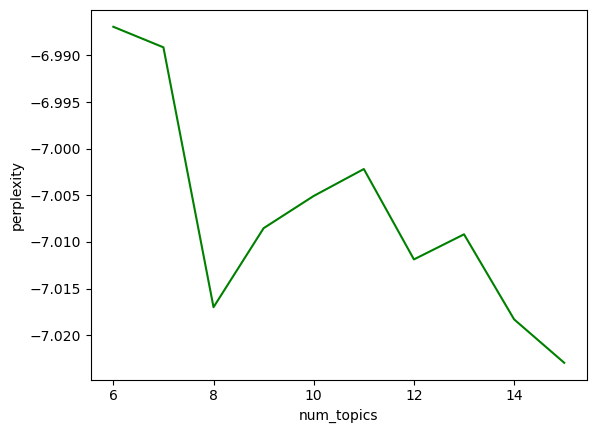

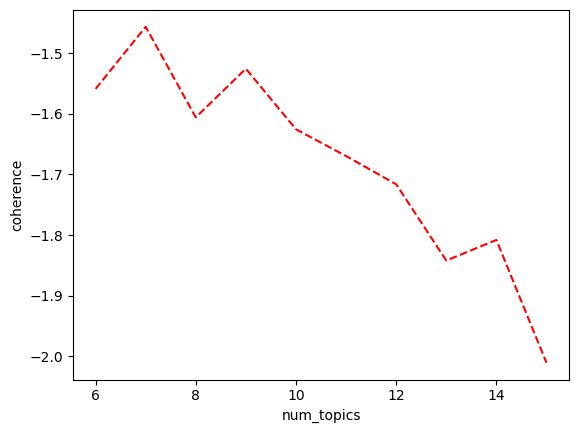

In [35]:
def show_coherence(corpus, dictionary, start=6, end=15):
    iter_num = []
    per_value = []
    coh_value = []

    for i in range(start, end + 1):
        model = LdaModel(corpus=corpus, id2word=dictionary,
                 chunksize=1000, num_topics=i,
                 random_state=7)
        iter_num.append(i)
        pv = model.log_perplexity(corpus)
        per_value.append(pv)
        
        cm = CoherenceModel(model=model, corpus=corpus, 
                            coherence='u_mass')
        cv = cm.get_coherence()
        coh_value.append(cv)
        print(f'num_topics: {i}, perplexity: {pv:0.3f}, coherence: {cv:0.3f}')

    plt.plot(iter_num, per_value, 'g-')
    plt.xlabel("num_topics")
    plt.ylabel("perplexity")
    plt.show()

    plt.plot(iter_num, coh_value, 'r--')
    plt.xlabel("num_topics")
    plt.ylabel("coherence")
    plt.show()

show_coherence(corpus, dictionary, start=6, end=15)

In [55]:
!pip install wget

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9680 sha256=395aef534f057435a1a024a2471a129d4629a878892654730187c7ecc740a5e4
  Stored in directory: c:\users\jupit\appdata\local\pip\cache\wheels\01\46\3b\e29ffbe4ebe614ff224bad40fc6a5773a67a163251585a13a9
Successfully built wget


In [57]:
import os
import wget
import ssl

data_dir = 'data'
url = 'https://s3.ap-northeast-2.amazonaws.com/data10902/petition/petition_sampled.csv'
ssl._create_default_https_context = ssl._create_unverified_context

if not os.path.exists(data_dir):
    os.mkdir(data_dir)

wget.download(url, data_dir)

100% [........................................................................] 24480914 / 24480914

'data/petition_sampled.csv'

In [37]:
import pandas as pd

df = pd.read_csv("./data/petition_sampled.csv") #read data
df.iloc[[2]]

,article_id,start,end,answered,votes,category,title,content
2,136,2017-08-20,2017-11-18,0,4,육아/교육,고등학교 교육 내용 수준을 낮춰주시고 실용적인 내용을 담아주세요!,저는 광주에 사는 중3 학생입니다. 고등학교 가기 직전의 학년이라 어느 때보다 고등...


In [39]:
from sklearn.feature_extraction.text import CountVectorizer
from konlpy.tag import Okt #konlpy에서 Twitter 형태소 분석기를 import
twit = Okt()

def tokenizer(doc):
    return [token for token in twit.nouns(doc) if len(token) > 1]

vec = CountVectorizer(tokenizer=tokenizer, #우선은 명사만 사용
                      max_df=0.5, min_df = 5, 
                      max_features = 1000) #적당한 대상 단어 수를 선택

pet_cv = vec.fit_transform(df.content)
print(pet_cv.shape)

C:\Users\jupit\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(18077, 1000)


In [ ]:
#18분 걸린다

In [45]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components = 15, \
                                n_jobs= -1, \
                                random_state=0)

%time pet_topics = lda.fit_transform(pet_cv)

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d: " % topic_idx, end='')
        print(", ".join([feature_names[i] 
                         for i in topic.argsort()[:-n_top_words - 1:-1]]))
print_top_words(lda,vec.get_feature_names_out(), 10)

CPU times: total: 2.05 s
Wall time: 22.9 s
Topic #0: 사람, 생각, 피해자, 처벌, 사건, 병원, 가해자, 자신, 피해, 환자
Topic #1: 북한, 한국, 우리, 대통령, 정부, 미국, 대한민국, 국민, 일본, 국가
Topic #2: 아이, 부모, 생각, 어린이집, 엄마, 교사, 우리, 유치원, 자녀, 가정
Topic #3: 청소년, 불법, 보호, 폐지, 장애인, 조직, 사찰, 게임, 생각, 이용
Topic #4: 국민, 대통령, 정부, 나라, 정책, 주택, 부동산, 서민, 사람, 지금
Topic #5: 일자리, 기업, 정부, 근무, 생각, 근로자, 지원, 임금, 최저임금, 정책
Topic #6: 국민, 청원, 국회의원, 국회, 의원, 생각, 반대, 청와대, 세금, 제도
Topic #7: 대한, 관리, 내용, 조사, 판결, 관련, 공사, 업무, 판사, 사실
Topic #8: 학생, 학교, 교육, 선수, 시험, 생각, 대학, 공부, 교사, 선생님
Topic #9: 보험, 연금, 국민연금, 공무원, 지급, 방송, 국민, 소득, 가입, 의료
Topic #10: 여성, 공무원, 사회, 남성, 생각, 의무, 남자, 대한민국, 여자, 행정
Topic #11: 경찰, 범죄, 국민, 위해, 대한민국, 조직, 불법, 만행, 사건, 수사
Topic #12: 차량, 사고, 처벌, 사건, 신고, 주차, 증거, 기사, 경우, 택시
Topic #13: 민원, 화폐, 가상, 정부, 투자, 거래, 시장, 규제, 계획, 주식
Topic #14: 사람, 지역, 회사, 저희, 대출, 생각, 미세먼지, 서울, 사용, 지금


In [49]:
from sklearn.feature_extraction.text import CountVectorizer
from konlpy.tag import Okt #konlpy에서 Twitter 형태소 분석기를 import

trend_data = pd.DataFrame(pet_topics, columns=['Topic'+str(i) for i in range(1, 16)])
trend_data = pd.concat([trend_data, df.start.map(lambda x: x[:7])], axis=1)
trend_data.iloc[:5, -5:]

,Topic12,Topic13,Topic14,Topic15,start
0,0.000307,0.000307,0.000307,0.000307,2017-08
1,0.000813,0.000813,0.000813,0.460206,2017-08
2,0.001449,0.001449,0.001449,0.001449,2017-08
3,0.000227,0.000227,0.000227,0.000227,2017-08
4,0.000447,0.000447,0.000447,0.000447,2017-08


In [51]:
trend = trend_data.groupby(['start']).mean()
trend.iloc[:5, -5:]

,Topic11,Topic12,Topic13,Topic14,Topic15
start,,,,,
2017-08,0.031905,0.010507,0.036244,0.025885,0.106103
2017-09,0.042780,0.024993,0.037086,0.021294,0.044257
2017-10,0.089529,0.053818,0.050834,0.033566,0.097228
2017-11,0.046314,0.046327,0.216338,0.041019,0.049564
2017-12,0.056824,0.026315,0.066910,0.050224,0.078167


C:\Users\jupit\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backends is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


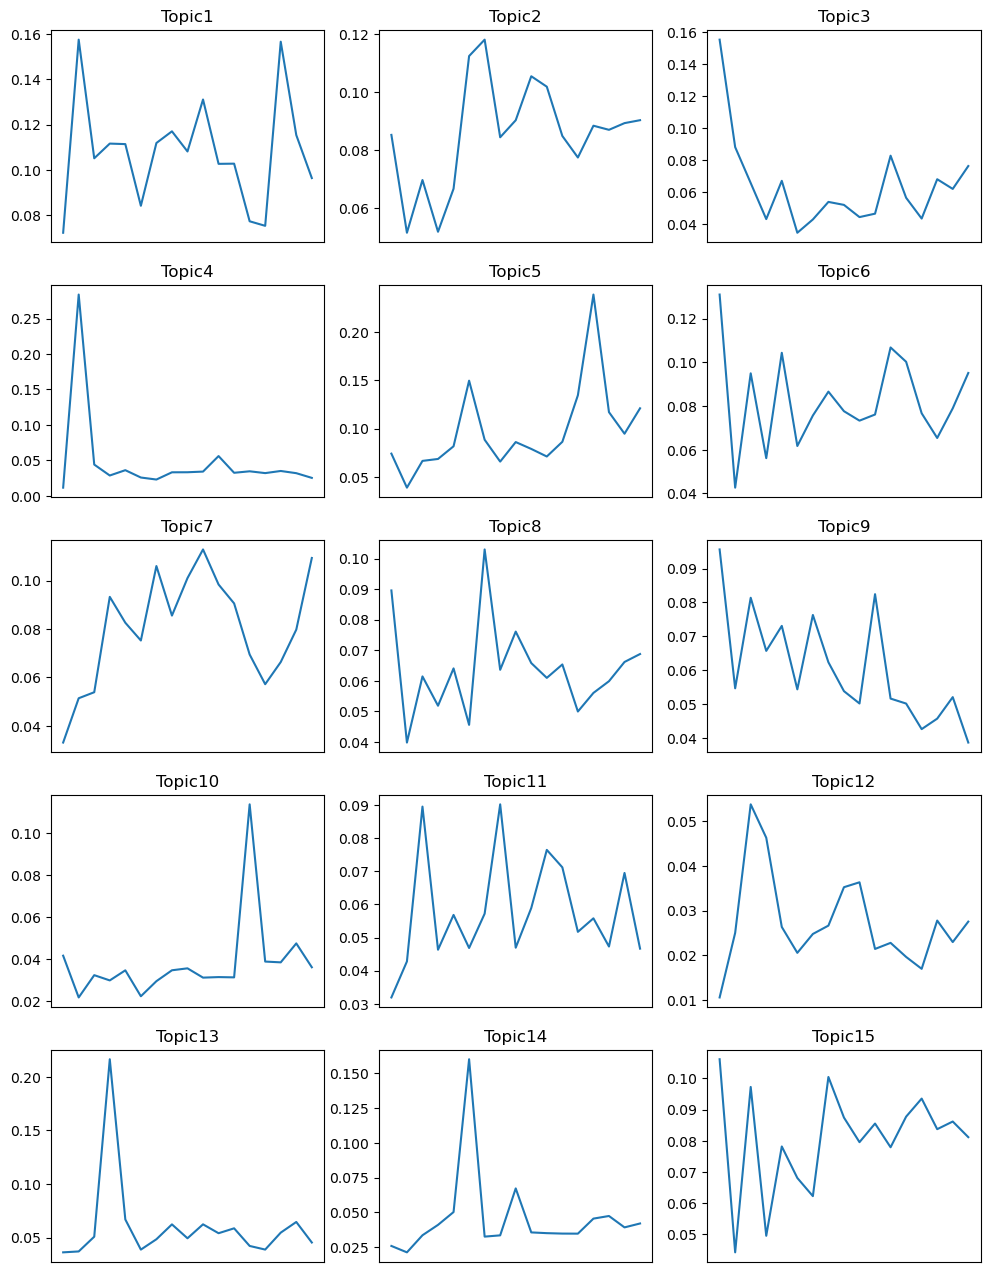

In [53]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(5, 3, sharex='col', figsize=(12, 16)) 
for col, ax in zip(trend.columns.tolist(), axes.ravel()): 
    ax.set_title(col)
    ax.axes.xaxis.set_visible(False)
    ax.plot(trend[col])
plt.show()